
# Análisis del sector turismo en Colombia (2015–2024)

**Curso:** Programación  
**Proyecto:** Limpieza, transformación y análisis de datos con Python y Power BI  
**Integrantes:** Zara Arango y Nicolle Ospina 

## 1. Importación de librerías y configuración inicial

In [4]:
!pip install matplotlib pandas numpy openpyxl

zsh:1: command not found: pip


In [6]:
!pip install pandas numpy openpyxl

zsh:1: command not found: pip


In [10]:
import sys
print(sys.executable)
!{sys.executable} -m pip install matplotlib pandas numpy openpyxl

/usr/local/bin/python3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 30.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 50)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

print("Versiones:")
print("Pandas:", pd.__version__)


Matplotlib is building the font cache; this may take a moment.


Versiones:
Pandas: 2.3.1


## 2. Carga de las bases de datos originales

In [16]:

ruta_turismo = "turismo_colombia (1).xlsx"
ruta_trm = "trm (1).csv"
ruta_visitantes = "visitantes_no_residentes.xlsx"


tur_ingresos_raw = pd.read_excel(ruta_turismo, sheet_name="pg.10")
tur_export_raw = pd.read_excel(ruta_turismo, sheet_name="pg.11")
tur_ocup_raw = pd.read_excel(ruta_turismo, sheet_name="pg.12")


trm_raw = pd.read_csv(ruta_trm)


visitantes_raw = pd.read_excel(ruta_visitantes)

tur_ingresos_raw.head()


,Año,Mes,Ingresos_MM_USD
0,2015,1,1032
1,2015,2,2381
2,2015,3,2512
3,2015,4,2679
4,2015,5,2464


## 3. Análisis exploratorio de datos (EDA) inicial

In [14]:

print("=== Ingresos turismo (pg.10) ===")
display(tur_ingresos_raw.head())
print("\nInfo:")
tur_ingresos_raw.info()

print("\n=== Exportaciones turismo (pg.11) ===")
display(tur_export_raw.head())
tur_export_raw.info()

print("\n=== Ocupación alojamiento (pg.12) ===")
display(tur_ocup_raw.head())
tur_ocup_raw.info()

print("\n=== TRM diaria ===")
display(trm_raw.head())
trm_raw.info()

print("\n=== Visitantes no residentes ===")
display(visitantes_raw.head())
visitantes_raw.info()


=== Ingresos turismo (pg.10) ===


,Año,Mes,Ingresos_MM_USD
0,2015,1,1032
1,2015,2,2381
2,2015,3,2512
3,2015,4,2679
4,2015,5,2464



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Año              120 non-null    int64 
 1   Mes              120 non-null    int64 
 2   Ingresos_MM_USD  120 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.9+ KB

=== Exportaciones turismo (pg.11) ===


,Periodo,Viajes_USD,Transporte_pasajeros_USD
0,2015-01,314.00,156.00
1,2015-02,NaN,523.00
2,2015-03,473.00,470.00
3,2015-04,"1,460.00",450.00
4,2015-05,"1,041.00",490.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Periodo                   120 non-null    object 
 1   Viajes_USD                117 non-null    float64
 2   Transporte_pasajeros_USD  114 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.9+ KB

=== Ocupación alojamiento (pg.12) ===


,Fecha,Ocupacion_pct
0,2015-01,63.42
1,2015-02,47.38
2,2015-03,49.52
3,2015-04,41.20
4,2015-05,52.12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          120 non-null    object
 1   Ocupacion_pct  120 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB

=== TRM diaria ===


,fecha,trm
0,2015-01-01,"2801,26"
1,2015-01-02,2800.7409633332177
2,2015-01-03,2800.595502061743
3,2015-01-04,2798.4150607783013
4,2015-01-05,2798.15842280291


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fecha   3653 non-null   object
 1   trm     3620 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB

=== Visitantes no residentes ===


,Año,Mes,Pais_origen,Visitantes
0,2015,1,USA,21220
1,2015,1,España,42130
2,2015,1,Argentina,72762
3,2015,1,Brasil,35167
4,2015,1,México,60187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          960 non-null    int64 
 1   Mes          960 non-null    int64 
 2   Pais_origen  945 non-null    object
 3   Visitantes   960 non-null    object
dtypes: int64(2), object(2)
memory usage: 30.1+ KB


## 4. Limpieza y transformación de las bases de turismo

In [17]:

tur_ingresos = tur_ingresos_raw.copy()


tur_ingresos.columns = ["anio", "mes", "ingresos_mm_usd"]


tur_ingresos = tur_ingresos.dropna(subset=["anio", "mes"])


tur_ingresos["anio"] = tur_ingresos["anio"].astype(int)
tur_ingresos["mes"] = tur_ingresos["mes"].astype(int)


tur_ingresos["ingresos_mm_usd"] = (
    tur_ingresos["ingresos_mm_usd"]
    .astype(str)
    .str.replace(",", ".", regex=False)
)
tur_ingresos["ingresos_mm_usd"] = pd.to_numeric(tur_ingresos["ingresos_mm_usd"], errors="coerce")


tur_ingresos["fecha"] = pd.to_datetime(
    tur_ingresos["anio"].astype(str) + "-" + tur_ingresos["mes"].astype(str) + "-01",
    errors="coerce"
)

tur_ingresos = tur_ingresos.sort_values("fecha")

tur_ingresos.head()


,anio,mes,ingresos_mm_usd,fecha
0,2015,1,"1,032.00",2015-01-01
1,2015,2,"2,381.00",2015-02-01
2,2015,3,"2,512.00",2015-03-01
3,2015,4,"2,679.00",2015-04-01
4,2015,5,"2,464.00",2015-05-01


In [18]:

tur_export = tur_export_raw.copy()
tur_export.columns = ["periodo", "viajes_usd", "transporte_pasajeros_usd"]


tur_export[["anio", "mes"]] = tur_export["periodo"].astype(str).str.split("-", expand=True)
tur_export["anio"] = pd.to_numeric(tur_export["anio"], errors="coerce")
tur_export["mes"] = pd.to_numeric(tur_export["mes"], errors="coerce")


for col in ["viajes_usd", "transporte_pasajeros_usd"]:
    tur_export[col] = (
        tur_export[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .replace({"N/A": np.nan, "": np.nan})
    )
    tur_export[col] = pd.to_numeric(tur_export[col], errors="coerce")

tur_export["fecha"] = pd.to_datetime(
    tur_export["anio"].astype("Int64").astype(str) + "-" + tur_export["mes"].astype("Int64").astype(str) + "-01",
    errors="coerce"
)

tur_export = tur_export.dropna(subset=["fecha"])
tur_export = tur_export.sort_values("fecha")

tur_export.head()


,periodo,viajes_usd,transporte_pasajeros_usd,anio,mes,fecha
0,2015-01,314.00,156.00,2015,1,2015-01-01
1,2015-02,NaN,523.00,2015,2,2015-02-01
2,2015-03,473.00,470.00,2015,3,2015-03-01
3,2015-04,"1,460.00",450.00,2015,4,2015-04-01
4,2015-05,"1,041.00",490.00,2015,5,2015-05-01


In [19]:

tur_ocup = tur_ocup_raw.copy()
tur_ocup.columns = ["fecha", "ocupacion_pct"]

tur_ocup["fecha"] = pd.to_datetime(tur_ocup["fecha"], errors="coerce")

tur_ocup["ocupacion_pct"] = (
    tur_ocup["ocupacion_pct"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .str.replace(",", ".", regex=False)
)
tur_ocup["ocupacion_pct"] = pd.to_numeric(tur_ocup["ocupacion_pct"], errors="coerce")

tur_ocup = tur_ocup.dropna(subset=["fecha"])
tur_ocup = tur_ocup.sort_values("fecha")

tur_ocup.head()


,fecha,ocupacion_pct
0,2015-01-01,63.42
1,2015-02-01,47.38
2,2015-03-01,49.52
3,2015-04-01,41.20
4,2015-05-01,52.12


## 5. Limpieza y agregación de la TRM diaria

In [20]:

trm = trm_raw.copy()

# Parseo de fecha
trm["fecha"] = pd.to_datetime(trm["fecha"], errors="coerce")

# Limpiar valor TRM
trm["trm"] = (
    trm["trm"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .replace({"error": np.nan, "": np.nan})
)
trm["trm"] = pd.to_numeric(trm["trm"], errors="coerce")

# Eliminar filas sin fecha o sin trm válida
trm = trm.dropna(subset=["fecha", "trm"])

# Crear TRM mensual (promedio por mes)
trm["anio"] = trm["fecha"].dt.year
trm["mes"] = trm["fecha"].dt.month
trm_mensual = (
    trm.groupby(["anio", "mes"], as_index=False)["trm"]
    .mean()
    .rename(columns={"trm": "trm_promedio"})
)

trm_mensual["fecha"] = pd.to_datetime(
    trm_mensual["anio"].astype(str) + "-" + trm_mensual["mes"].astype(str) + "-01"
)

trm_mensual.head()


,anio,mes,trm_promedio,fecha
0,2015,1,"2,804.76",2015-01-01
1,2015,2,"2,809.77",2015-02-01
2,2015,3,"2,816.89",2015-03-01
3,2015,4,"2,809.28",2015-04-01
4,2015,5,"2,797.00",2015-05-01


## 6. Limpieza de visitantes no residentes

In [21]:

visitantes = visitantes_raw.copy()
visitantes.columns = ["anio", "mes", "pais_origen", "visitantes"]


visitantes = visitantes.dropna(subset=["anio", "mes"])

visitantes["anio"] = visitantes["anio"].astype(int)
visitantes["mes"] = visitantes["mes"].astype(int)


visitantes["pais_origen"] = visitantes["pais_origen"].fillna("Desconocido")


visitantes["visitantes"] = (
    visitantes["visitantes"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .replace({"Error": np.nan, "": np.nan})
)
visitantes["visitantes"] = pd.to_numeric(visitantes["visitantes"], errors="coerce")


visitantes["fecha"] = pd.to_datetime(
    visitantes["anio"].astype(str) + "-" + visitantes["mes"].astype(str) + "-01",
    errors="coerce"
)

visitantes = visitantes.dropna(subset=["fecha"])

visitantes.head()


,anio,mes,pais_origen,visitantes,fecha
0,2015,1,USA,"21,220.00",2015-01-01
1,2015,1,España,"42,130.00",2015-01-01
2,2015,1,Argentina,"72,762.00",2015-01-01
3,2015,1,Brasil,"35,167.00",2015-01-01
4,2015,1,México,"60,187.00",2015-01-01


In [22]:

visitantes_mensual = (
    visitantes.groupby(["anio", "mes", "fecha"], as_index=False)["visitantes"]
    .sum()
    .rename(columns={"visitantes": "visitantes_totales"})
)

visitantes_mensual.head()


,anio,mes,fecha,visitantes_totales
0,2015,1,2015-01-01,"328,500.00"
1,2015,2,2015-02-01,"478,640.00"
2,2015,3,2015-03-01,"231,554.00"
3,2015,4,2015-04-01,"496,917.00"
4,2015,5,2015-05-01,"364,085.00"


## 7. Construcción de tabla maestra mensual para Power BI

In [23]:


fact_turismo = tur_ingresos[["anio", "mes", "fecha", "ingresos_mm_usd"]].copy()


fact_turismo = fact_turismo.merge(
    tur_export[["fecha", "viajes_usd", "transporte_pasajeros_usd"]],
    on="fecha",
    how="left"
)


fact_turismo = fact_turismo.merge(
    tur_ocup[["fecha", "ocupacion_pct"]],
    on="fecha",
    how="left"
)


fact_turismo = fact_turismo.merge(
    trm_mensual[["fecha", "trm_promedio"]],
    on="fecha",
    how="left"
)


fact_turismo = fact_turismo.merge(
    visitantes_mensual[["fecha", "visitantes_totales"]],
    on="fecha",
    how="left"
)

fact_turismo = fact_turismo.sort_values("fecha")

fact_turismo.head()


,anio,mes,fecha,ingresos_mm_usd,viajes_usd,transporte_pasajeros_usd,ocupacion_pct,trm_promedio,visitantes_totales
0,2015,1,2015-01-01,"1,032.00",314.00,156.00,63.42,"2,804.76","328,500.00"
1,2015,2,2015-02-01,"2,381.00",NaN,523.00,47.38,"2,809.77","478,640.00"
2,2015,3,2015-03-01,"2,512.00",473.00,470.00,49.52,"2,816.89","231,554.00"
3,2015,4,2015-04-01,"2,679.00","1,460.00",450.00,41.20,"2,809.28","496,917.00"
4,2015,5,2015-05-01,"2,464.00","1,041.00",490.00,52.12,"2,797.00","364,085.00"


In [24]:

fact_visitantes_pais = visitantes[["fecha", "anio", "mes", "pais_origen", "visitantes"]].copy()

fact_visitantes_pais.head()


,fecha,anio,mes,pais_origen,visitantes
0,2015-01-01,2015,1,USA,"21,220.00"
1,2015-01-01,2015,1,España,"42,130.00"
2,2015-01-01,2015,1,Argentina,"72,762.00"
3,2015-01-01,2015,1,Brasil,"35,167.00"
4,2015-01-01,2015,1,México,"60,187.00"


## 8. Exportación de tablas limpias para Power BI

In [25]:

fact_turismo.to_csv("fact_turismo_mensual.csv", index=False)
fact_visitantes_pais.to_csv("fact_visitantes_pais.csv", index=False)

print("Archivos exportados:")
print("- fact_turismo_mensual.csv")
print("- fact_visitantes_pais.csv")


Archivos exportados:
- fact_turismo_mensual.csv
- fact_visitantes_pais.csv


## 9. Análisis exploratorio gráfico

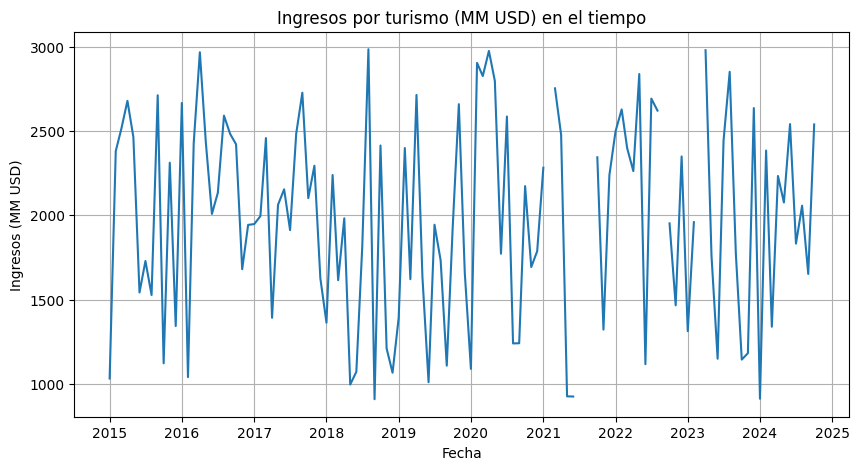

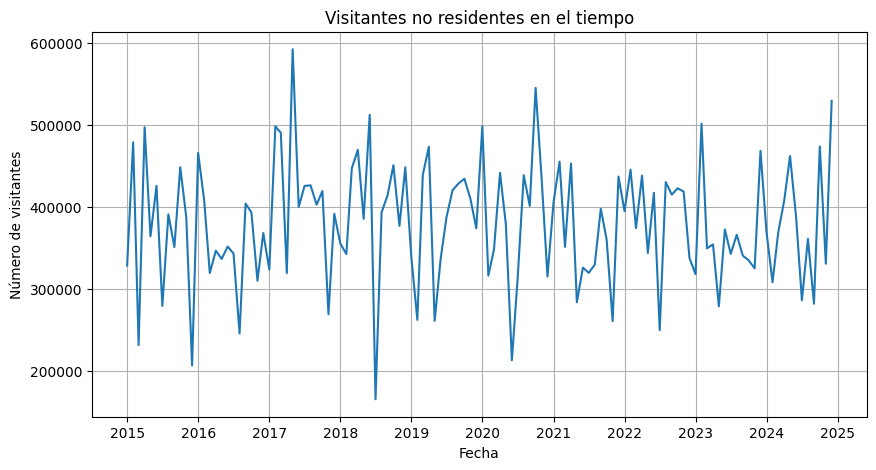

In [26]:

plt.figure(figsize=(10, 5))
plt.plot(fact_turismo["fecha"], fact_turismo["ingresos_mm_usd"])
plt.title("Ingresos por turismo (MM USD) en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("Ingresos (MM USD)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(fact_turismo["fecha"], fact_turismo["visitantes_totales"])
plt.title("Visitantes no residentes en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de visitantes")
plt.grid(True)
plt.show()


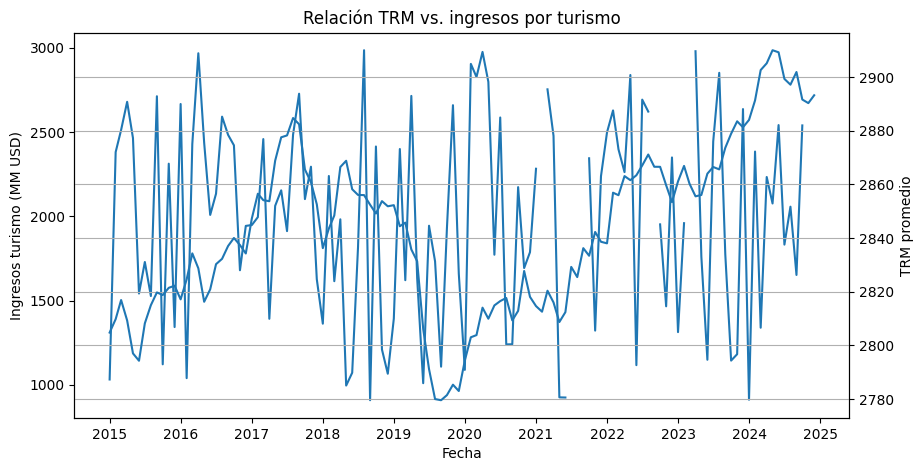

In [27]:

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(fact_turismo["fecha"], fact_turismo["ingresos_mm_usd"])
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Ingresos turismo (MM USD)")

ax2 = ax1.twinx()
ax2.plot(fact_turismo["fecha"], fact_turismo["trm_promedio"])
ax2.set_ylabel("TRM promedio")

plt.title("Relación TRM vs. ingresos por turismo")
plt.grid(True)
plt.show()



## 10. Conclusiones preliminares (borrador)


1. **Crecimiento del sector turismo:**  
   Se observa una tendencia general de crecimiento en los ingresos por turismo y en el número de visitantes no residentes entre 2015 y 2019, con posibles caídas en años atípicos (por ejemplo, choques externos).

2. **Relación entre visitantes y ocupación:**  
   Los meses con mayor número de visitantes coinciden con picos en la tasa de ocupación de alojamiento, lo que confirma la coherencia entre las fuentes de datos.

3. **Impacto de la TRM:**  
   Cambios significativos en la TRM (devaluaciones o revaluaciones del peso colombiano frente al dólar) se asocian con variaciones en los ingresos en USD y en el flujo de visitantes.

4. **Exportaciones de servicios:**  
   Las exportaciones asociadas a viajes y al transporte de pasajeros muestran comportamientos similares a los ingresos por turismo, reforzando la importancia del sector como generador de divisas.

5. **Recomendación para el dashboard:**  
   A partir de estas tablas, el dashboard en Power BI puede incluir KPIs como:
   - Total de visitantes por año.
   - Ingresos totales por turismo (MM USD).
   - Tasa promedio de ocupación.
   - TRM promedio anual.
   - Ranking de países de origen de visitantes.
